In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("~/Downloads/insurance_train.csv")
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


<AxesSubplot:xlabel='is_claim', ylabel='count'>

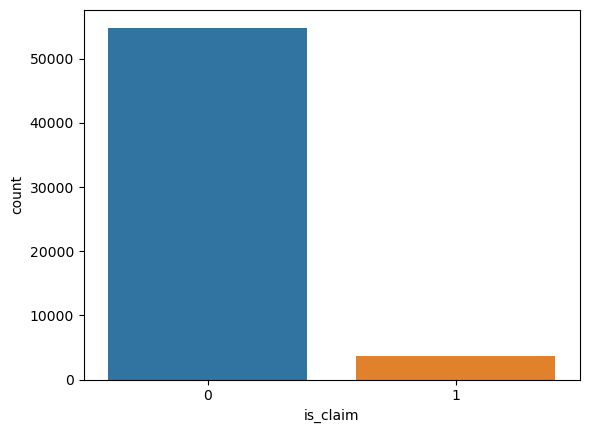

In [3]:
# Target variable

sns.countplot(x = "is_claim", data =train)

In [4]:
train.is_claim.value_counts(normalize = True)

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

In [5]:
# Univariate...
#nums & Cats

train.select_dtypes(exclude = np.number).columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [6]:
num_cols = ['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'displacement', 
       'turning_radius', 'length', 'width', 'height',
       'gross_weight']

len(num_cols)

10

In [7]:
# 

cat_cols = ['area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 
 'make', 'airbags','ncap_rating','cylinder','gear_box']

len(cat_cols)

32

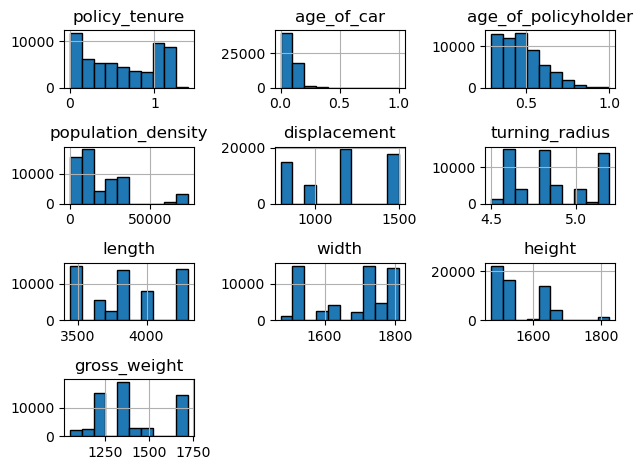

In [8]:
train.loc[:, num_cols].hist(edgecolor = "black")
plt.tight_layout()
plt.show()

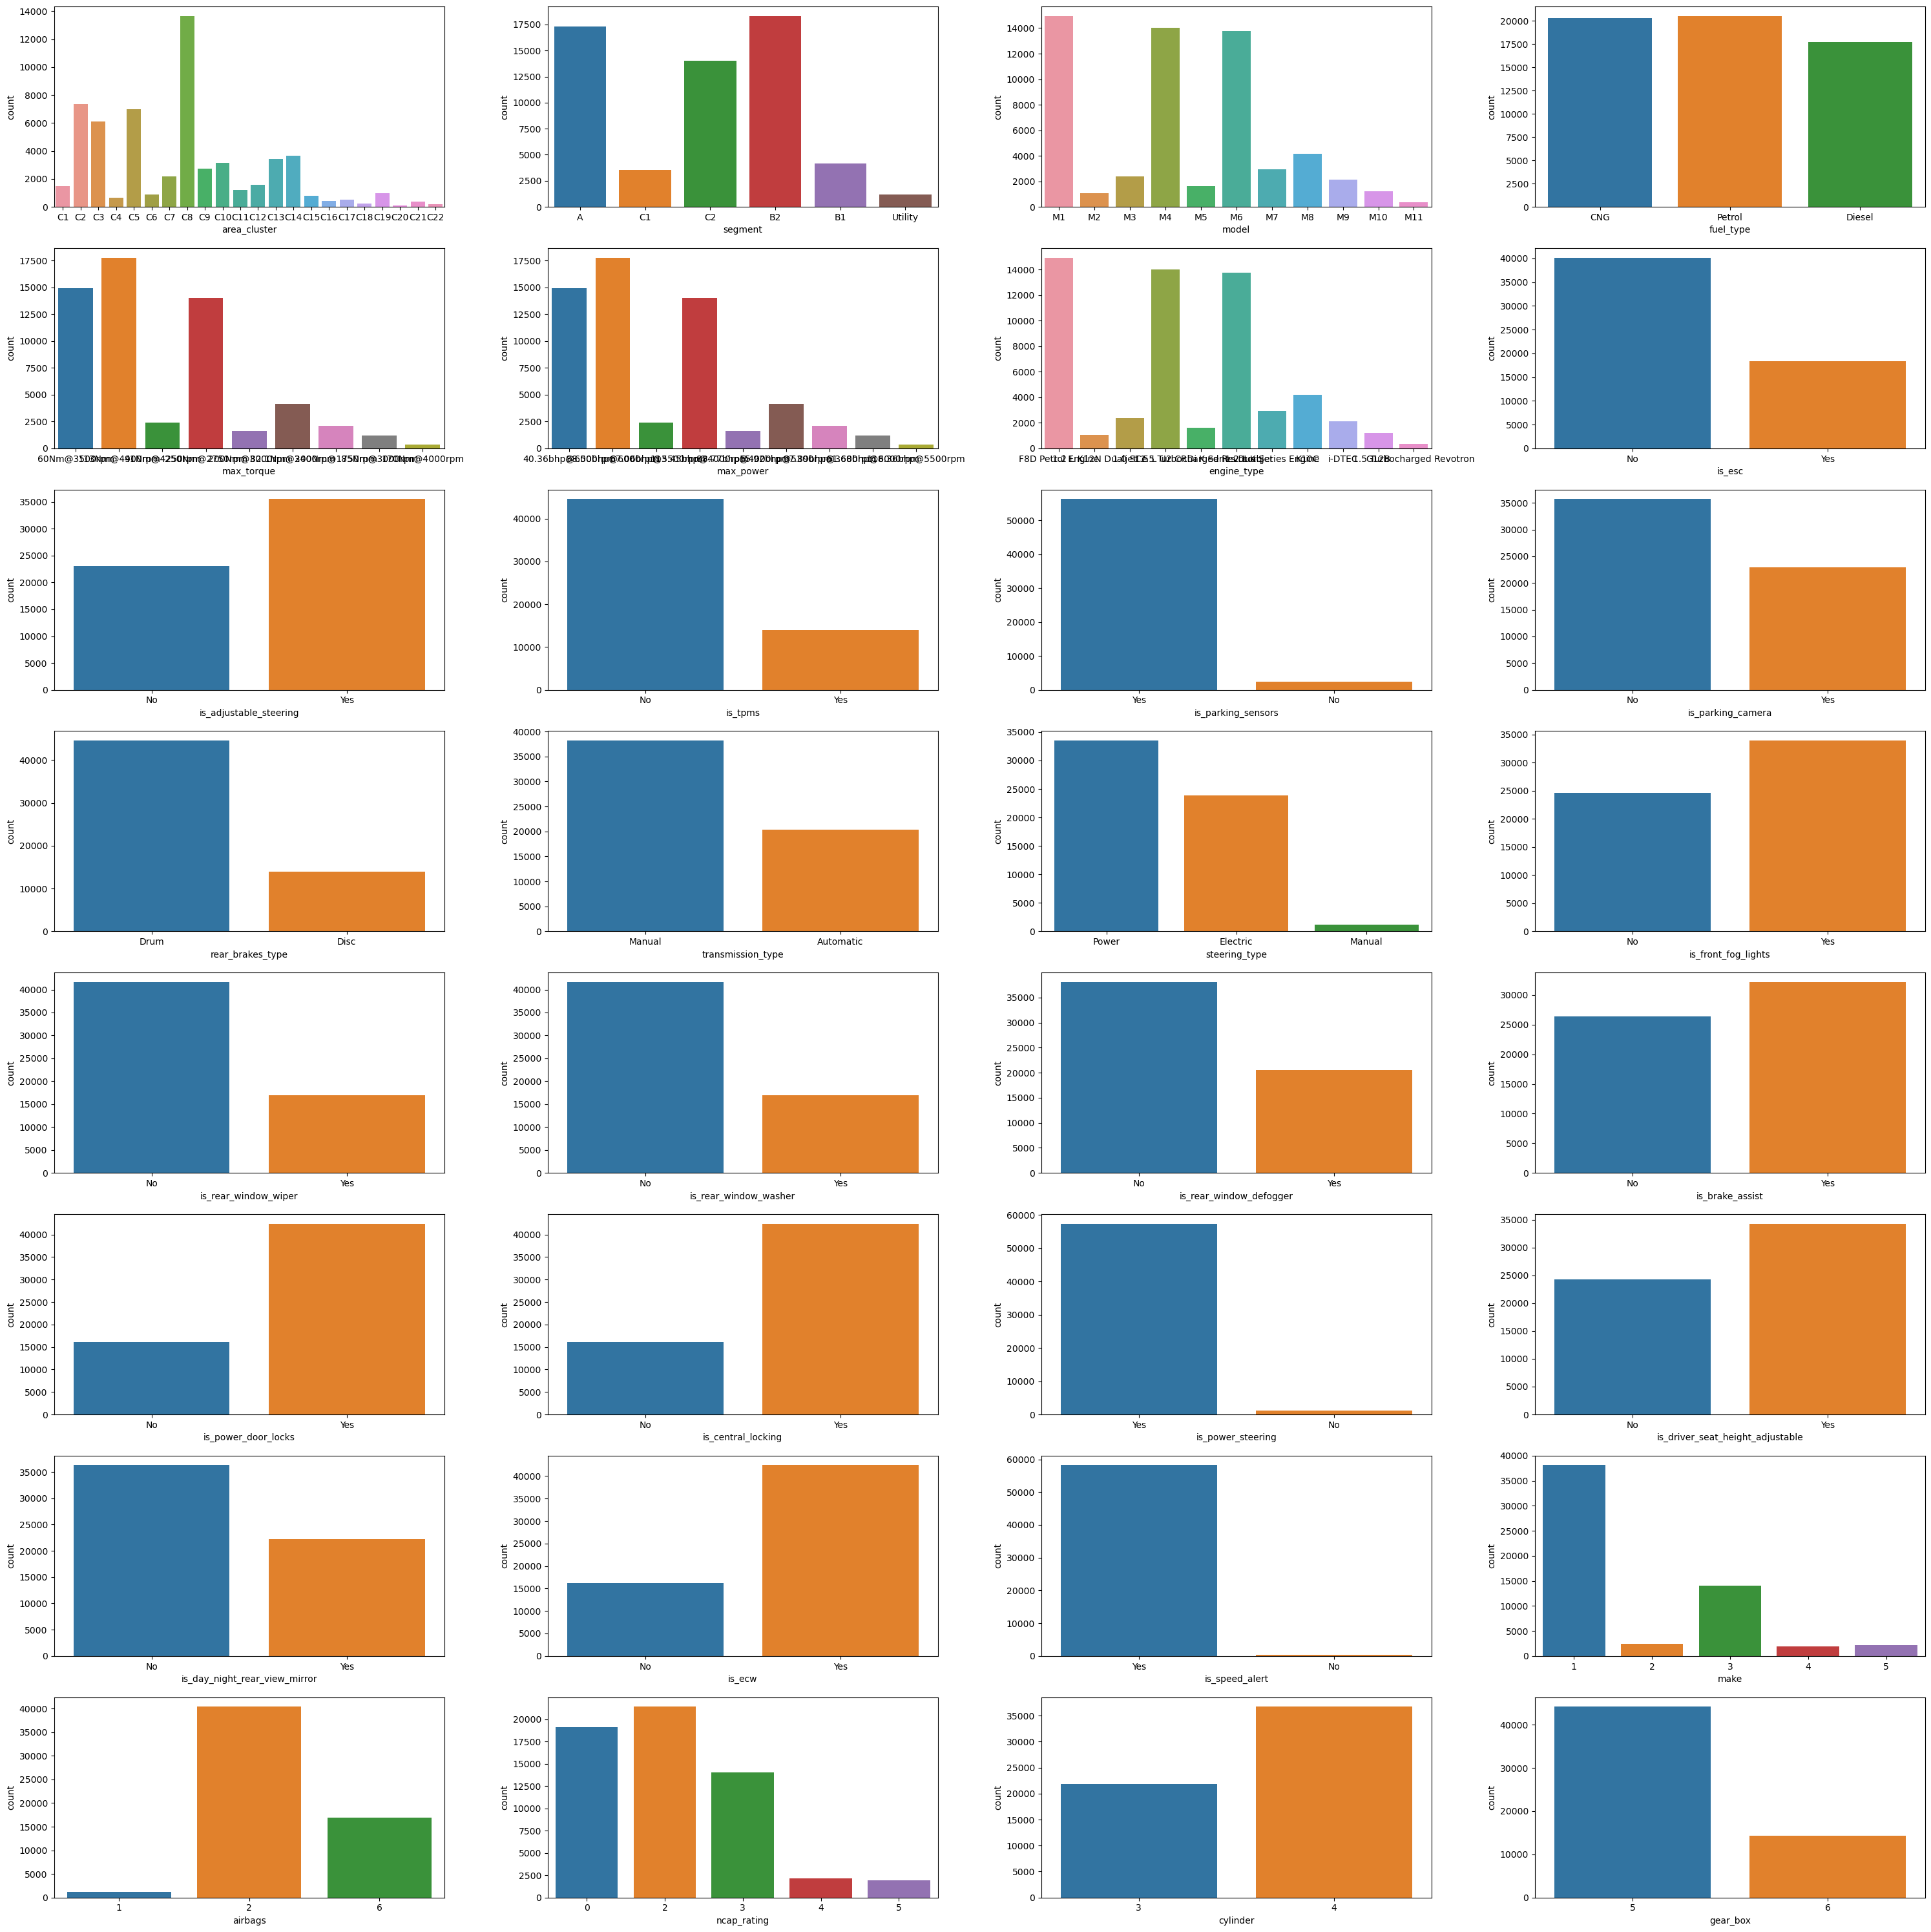

In [9]:
nrows = 8
ncols = 4
iterator = 1

plt.figure(figsize = (30, 30))
for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.countplot(x = i, data = train)
    iterator+=1
    
plt.tight_layout()
plt.show()

# C8 is the biggest area cluster
# Highest Segment is B2, C2 and A
# Model: M1, M4 and M6
# Fuel Type: CNG and Petrol
# 

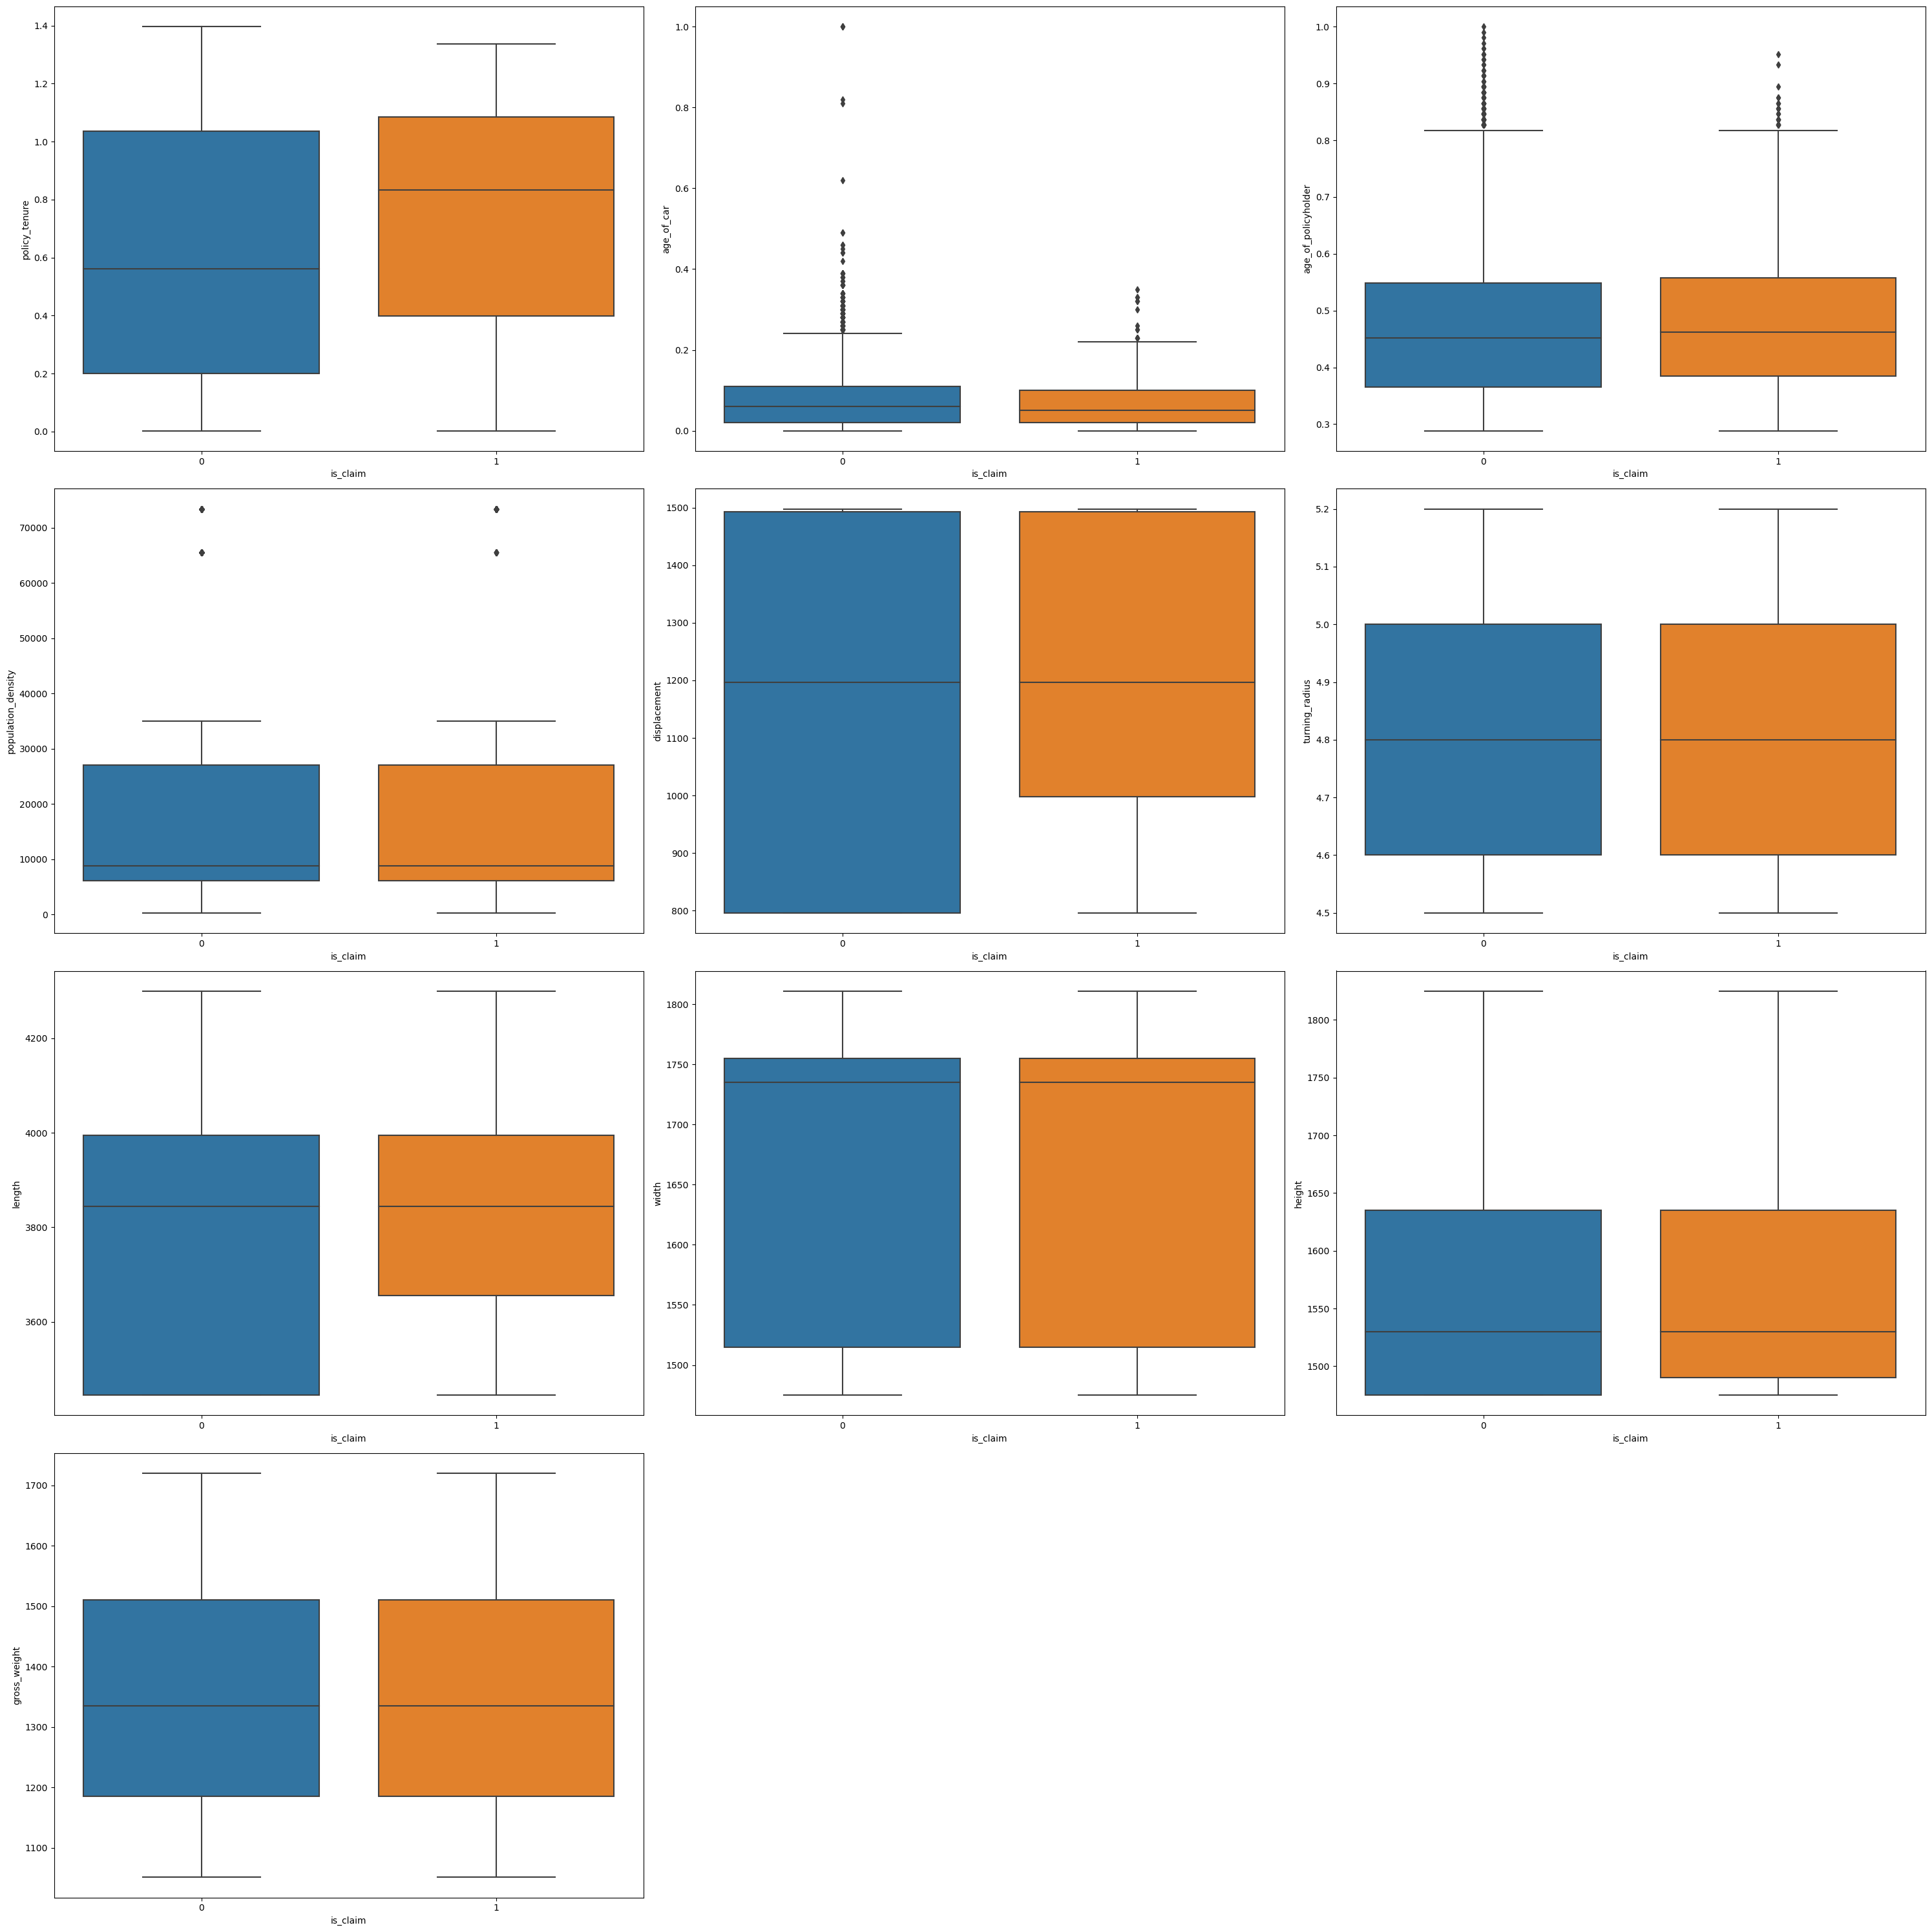

In [10]:
# Bivariate Analysis: Num vs Cat
nrows = 4
ncols = 3
iterator = 1

plt.figure(figsize = (30, 30))
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.boxplot(y = i, x = "is_claim", data = train)
    iterator+=1
    
plt.tight_layout()
plt.show()

<Figure size 3000x3000 with 0 Axes>

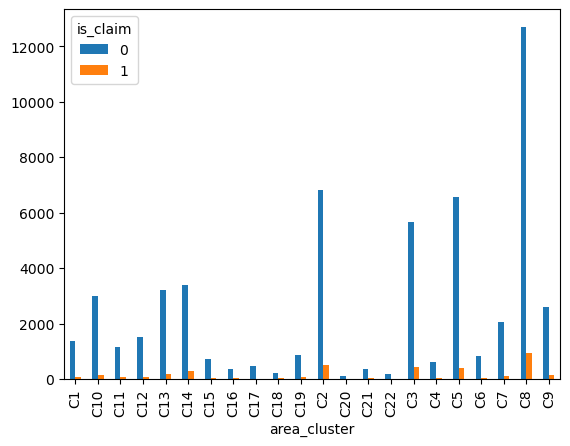

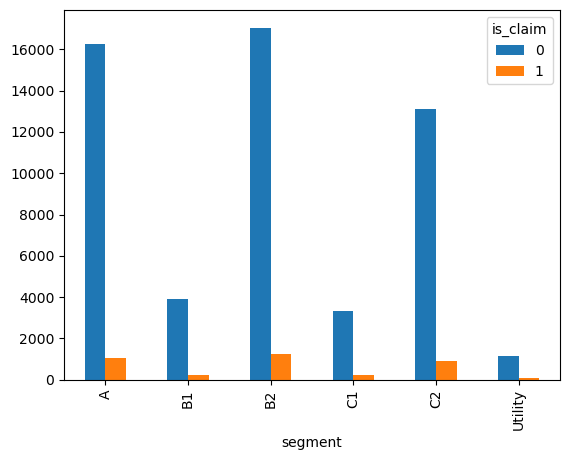

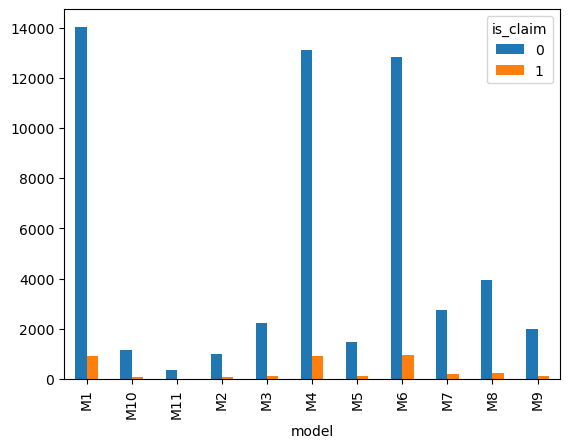

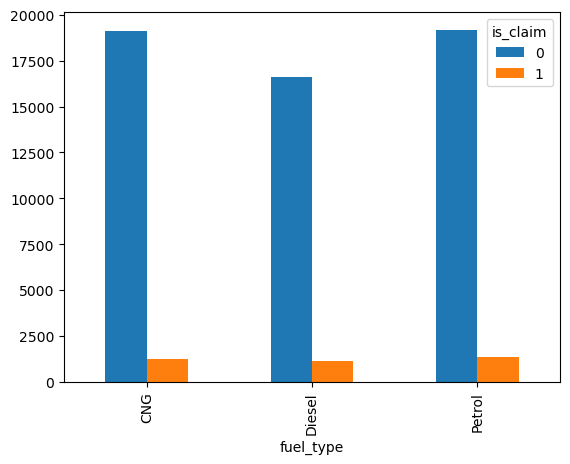

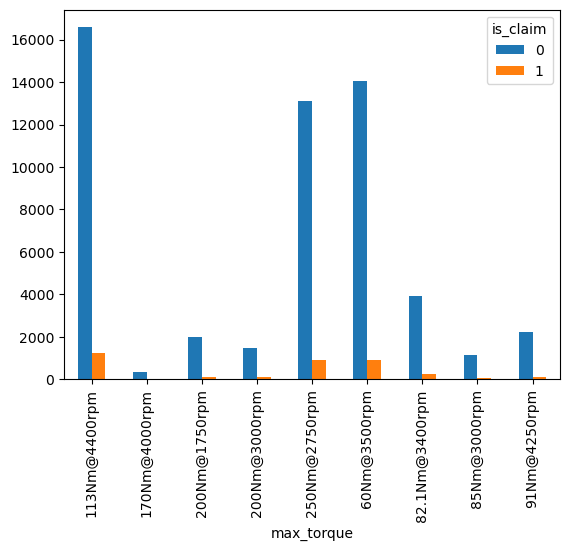

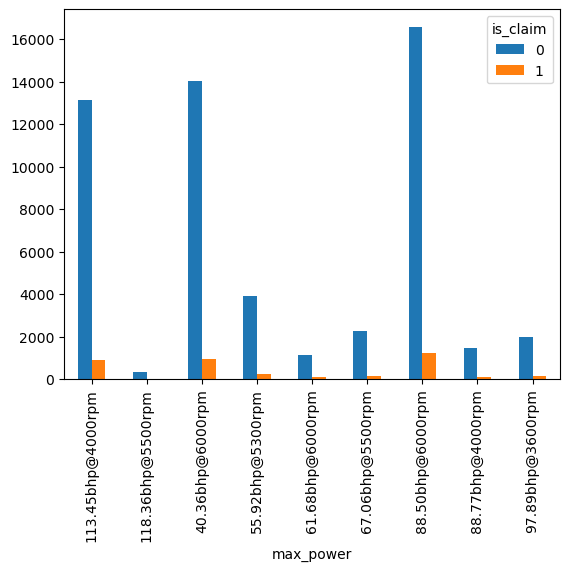

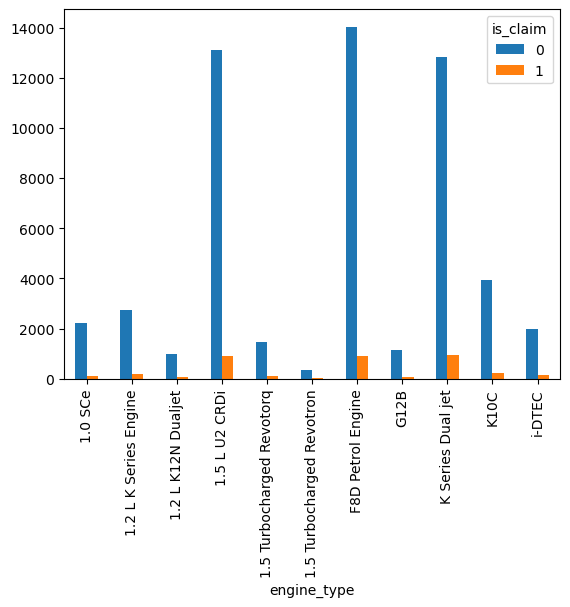

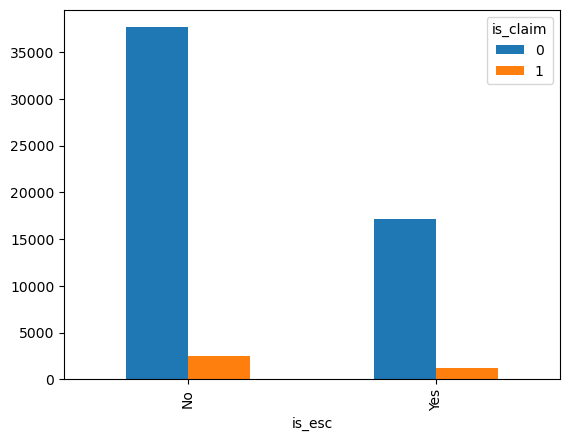

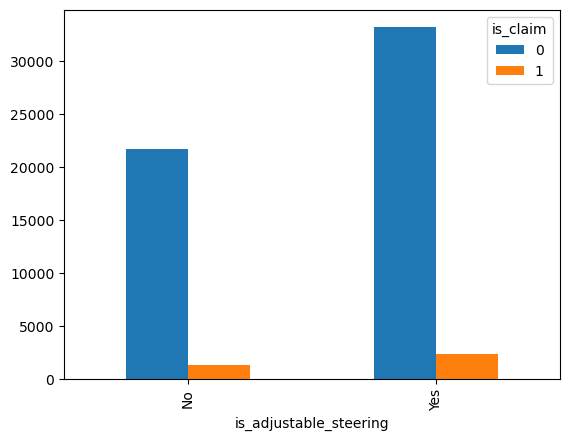

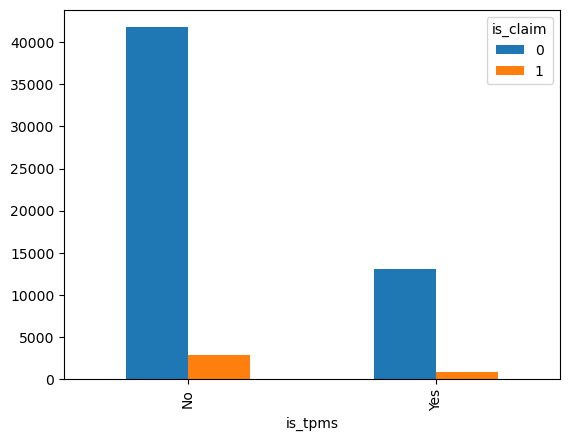

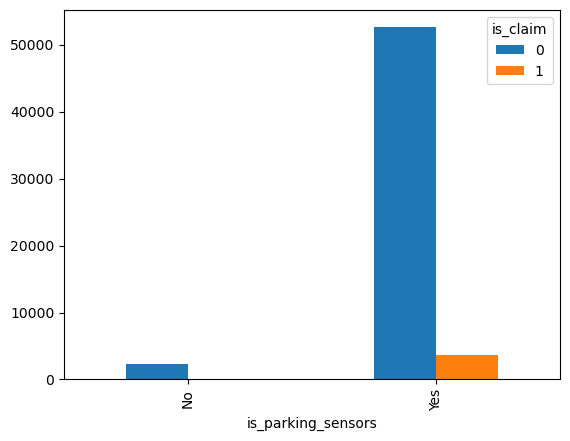

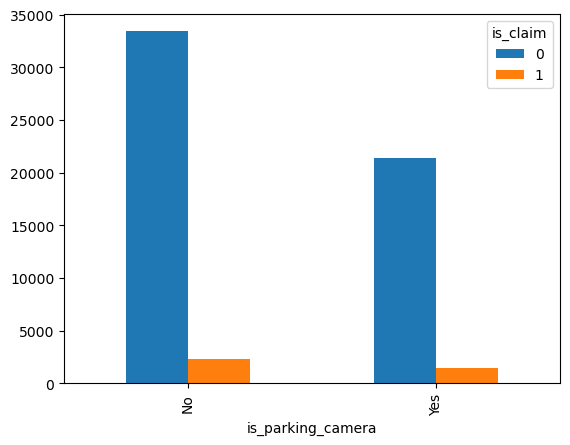

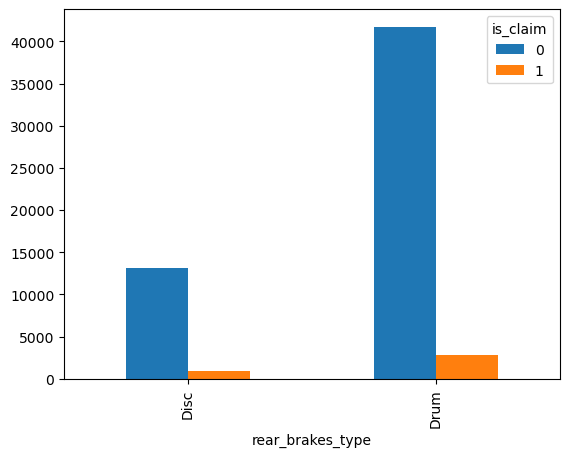

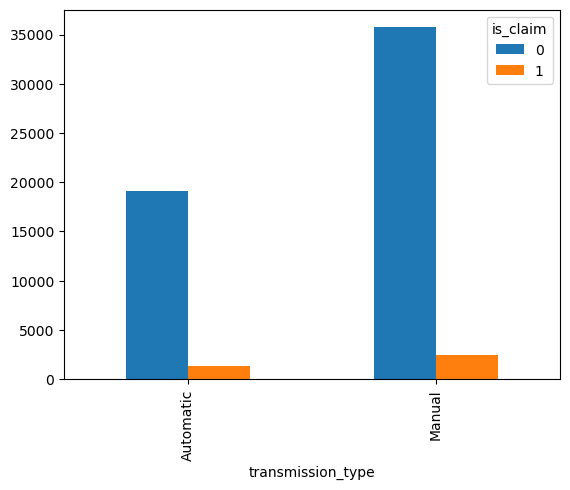

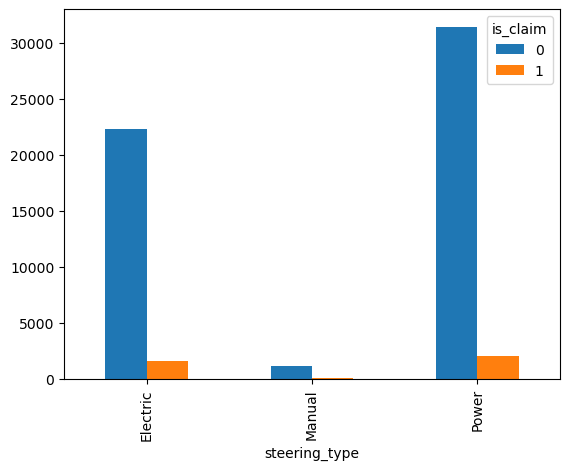

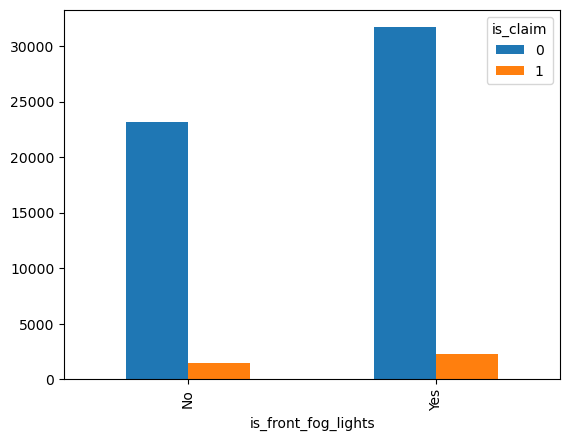

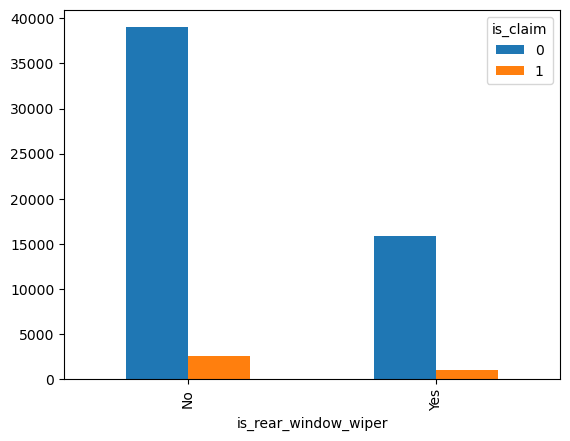

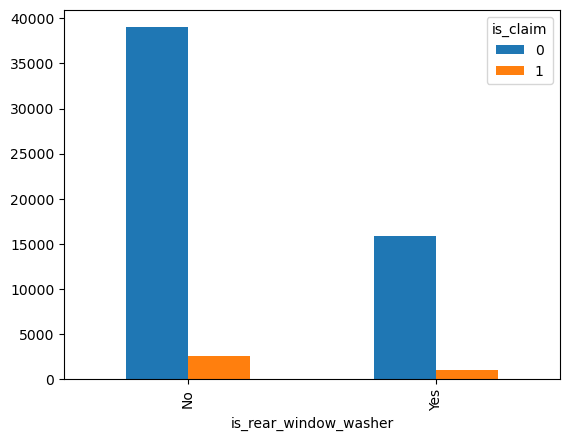

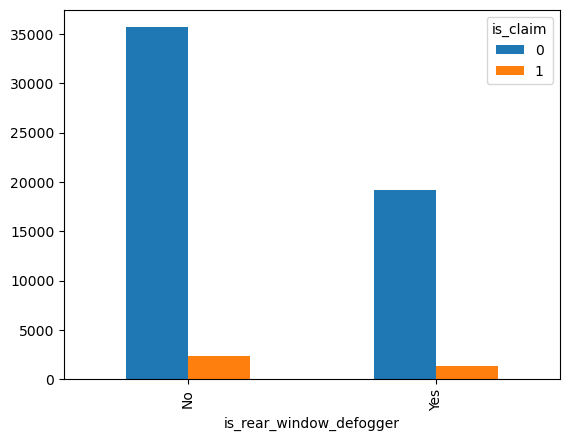

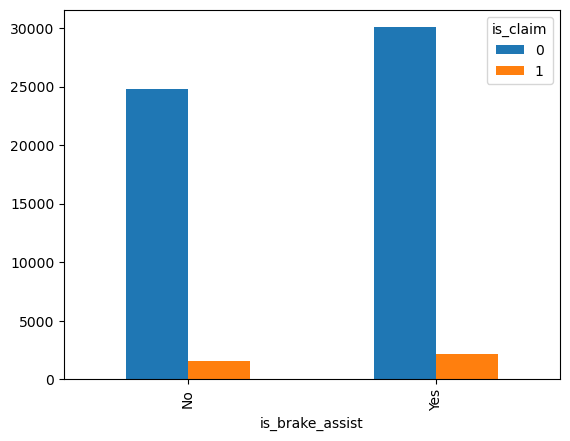

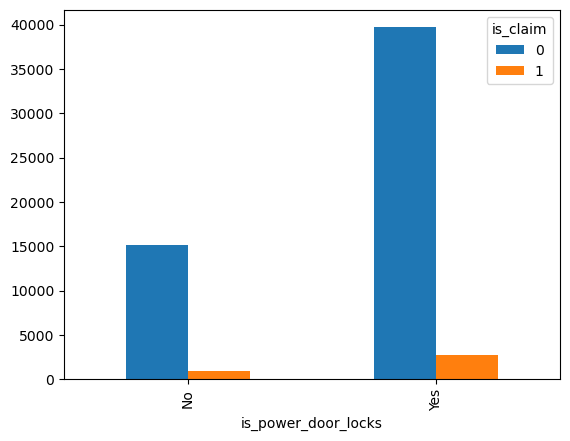

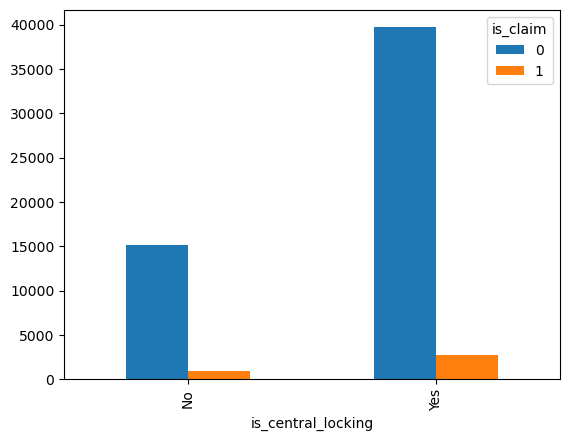

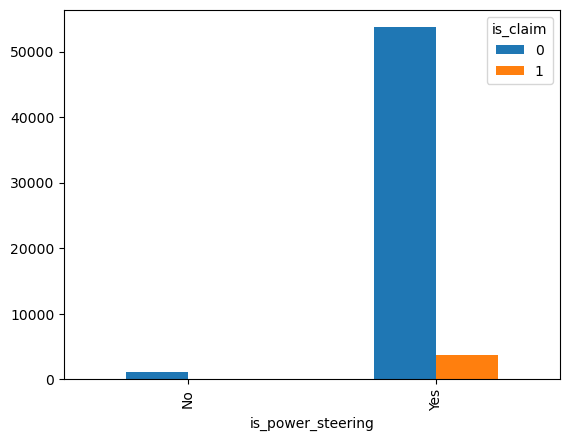

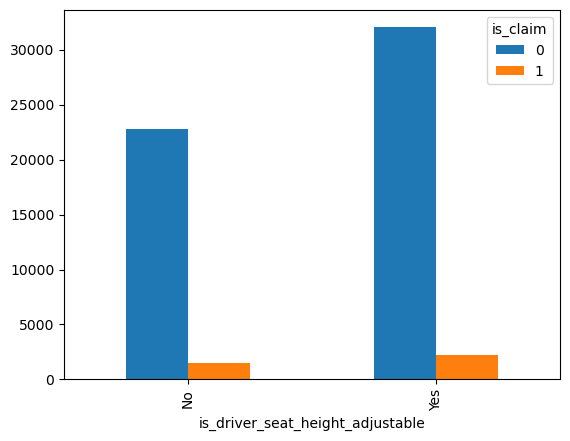

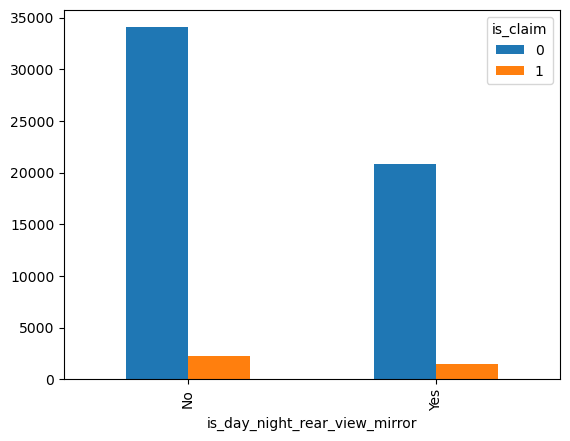

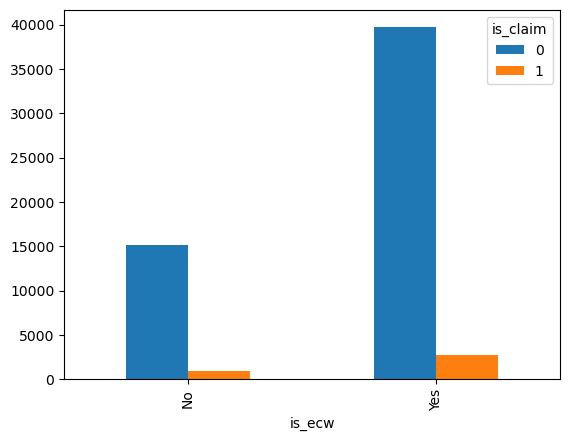

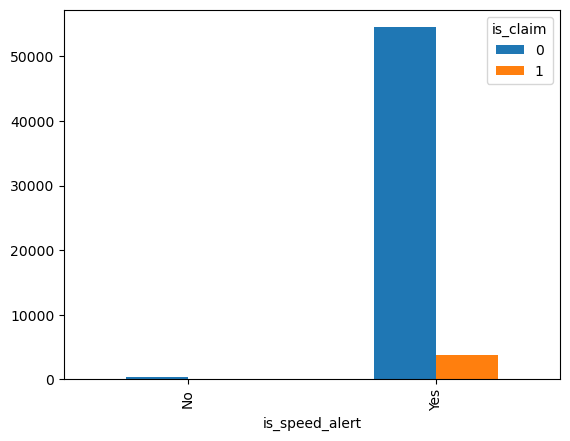

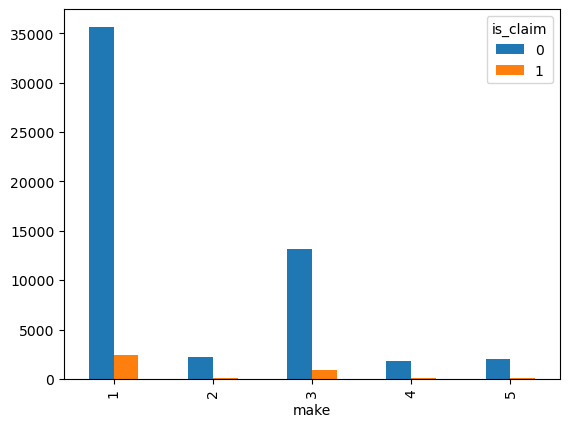

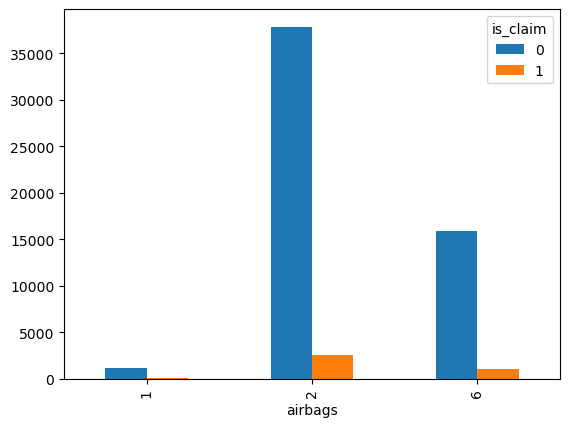

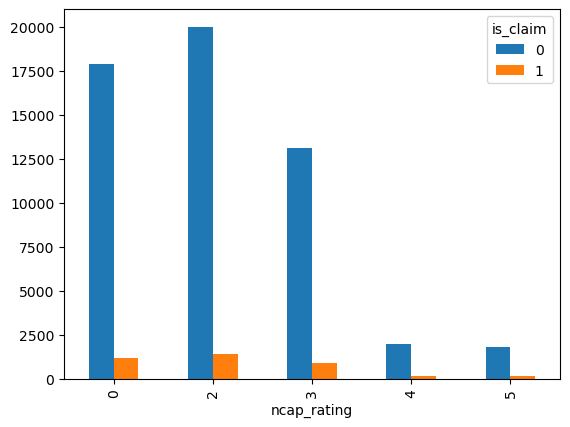

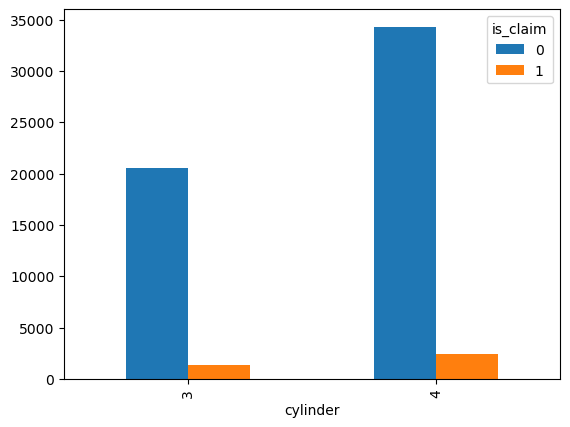

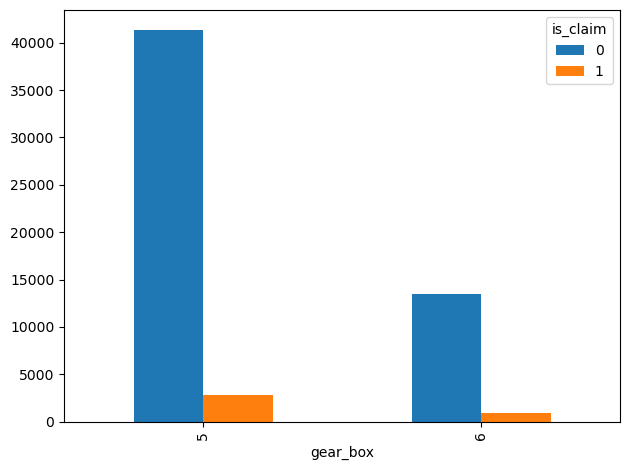

In [11]:
# Cat vs Cat

nrows = 8
ncols = 4
iterator = 1

plt.figure(figsize = (30, 30))
for i in cat_cols:
    tbl = pd.crosstab(train.loc[:,i], train.is_claim)
    #sns.countplot(x = i, data = train)
    tbl.plot(kind = "bar")
    iterator+=1
    
plt.tight_layout()
plt.show()

In [12]:
# Missing Values

train.isnull().sum().sum()

0

### Feature Engineering

In [13]:
# 'max_torque', 'max_power'

train[["Nm", "torque_rpm"]] = \
train.max_torque.str.split("@", expand = True)

In [14]:
train["Nm"] = train.Nm.apply(lambda x:x[:-2])
train["Nm"] = pd.to_numeric(train.Nm)

In [15]:
train["torque_rpm"] = train.torque_rpm.apply(lambda x:x[:-3])
train["torque_rpm"] = pd.to_numeric(train.torque_rpm)

In [16]:
train[["bhp", "rpm_power"]] = \
train.max_power.str.split("@", expand = True)

In [17]:
#train.rpm_power.apply(lambda x:x[:-3])

In [18]:
train["bhp"] = train.bhp.apply(lambda x:x[:-3])
train["bhp"] = pd.to_numeric(train.bhp)

In [19]:
train["rpm_power"] = train.rpm_power.apply(lambda x:x[:-3])
train["rpm_power"] = pd.to_numeric(train.rpm_power)

In [20]:
pd.set_option("display.max_columns", 60)
train.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'Nm',
       'torque_rpm', 'bhp', 'rpm_power'],
      dtype='object')

In [21]:
colnames = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']

mapped = {"Yes":1, "No":0}

for i in colnames:
    train.loc[:, i] = train.loc[:, i].map(mapped)

In [22]:
train.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm,torque_rpm,bhp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000


In [23]:
# Area Cluster

pd.crosstab(train.area_cluster, train.is_claim).\
sort_values(by = 1,ascending = False)

clusters = ["C8", "C2", "C3", "C5", "C14"]

def cluster_cat(x):
    if x in clusters:
        return("HC_Cluster")
    else:
        return("LC_Cluster")

In [24]:
train["area_cluster"] = train.area_cluster.apply(cluster_cat)

In [25]:
# Ho: Area Cluster has no relation with the claims received
# Ha: Ho is False

import scipy.stats as stats
tbl = pd.crosstab(train.area_cluster, train.is_claim)

teststats, pvalue, df, exp = stats.chi2_contingency(tbl)
print(pvalue)

4.736737378350726e-10


In [26]:
# Segment, Model and then Engine Type

pd.crosstab(train.segment, train.is_claim).\
sort_values(by = 1,ascending = False)

clusters = ["C2", "B2", "A"]

def cluster_cat(x):
    if x in clusters:
        return("HC_Seg")
    else:
        return("LC_Seg")

In [27]:
train["segment"] = train.segment.apply(cluster_cat)

In [28]:
pd.crosstab(train.model, train.is_claim).\
sort_values(by = 1,ascending = False)

clusters = ["M6", "M1", "M4"]

def cluster_cat(x):
    if x in clusters:
        return("HC_Model")
    else:
        return("LC_Model")

In [29]:
train["model"] = train.model.apply(cluster_cat)

In [30]:
train.model.value_counts(normalize = True)

HC_Model    0.729485
LC_Model    0.270515
Name: model, dtype: float64

In [31]:
pd.crosstab(train.engine_type, train.is_claim).\
sort_values(by = 1,ascending = False)

clusters = ["K Series Dual jet", 
            "F8D Petrol Engine", 
            "1.5 L U2 CRDi"]

def cluster_cat(x):
    if x in clusters:
        return("HC_Engine")
    else:
        return("LC_Engine")

In [32]:
train["engine_type"] = train.engine_type.apply(cluster_cat)

In [33]:
train.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm,torque_rpm,bhp,rpm_power
0,ID00001,0.515874,0.05,0.644231,LC_Cluster,4990,1,HC_Seg,HC_Model,CNG,60Nm@3500rpm,40.36bhp@6000rpm,HC_Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000
1,ID00002,0.672619,0.02,0.375000,HC_Cluster,27003,1,HC_Seg,HC_Model,CNG,60Nm@3500rpm,40.36bhp@6000rpm,HC_Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000


In [34]:
# NCap Rating
pd.crosstab(train.ncap_rating, train.is_claim).\
sort_values(by = 1,ascending = False)

is_claim,0,1
ncap_rating,,
2,20011,1391
0,17905,1192
3,13117,901
4,1981,133
5,1830,131


In [35]:
train["ncap_rating"] = train.ncap_rating.\
apply(lambda x:"Low_Claim_HR" 
      if x in [4, 5] 
      else "High_Claim_LR")

In [36]:
# Drop the Unnecessary Columns
newtrain = train.drop(["policy_id", "max_torque", "max_power"], 
          axis = 1)

### Statistical Test

In [37]:
kya_naam_de = newtrain.select_dtypes(exclude = np.number).columns

In [38]:
imp = []
for i in colnames:
    tbl = pd.crosstab(newtrain.loc[:, i], newtrain.is_claim)
    teststats,pvalue, df, exp = stats.chi2_contingency(tbl)
    #print(i, pvalue)
    if pvalue<0.05:
        imp.append(i)

In [39]:
final_cats = imp+["area_cluster"]
print(final_cats)

['is_adjustable_steering', 'is_parking_sensors', 'is_front_fog_lights', 'is_brake_assist', 'is_driver_seat_height_adjustable', 'area_cluster']


In [40]:
nums = ['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 
        'Nm', 'torque_rpm', 'bhp','rpm_power',
       'displacement','turning_radius', 'length', 
        'width', 'height', 'gross_weight']

num_imp = []
for i in nums:
    zero = newtrain.loc[newtrain.is_claim==0, i]
    one = newtrain.loc[newtrain.is_claim==1, i]
    teststats, pvalue = stats.ttest_ind(zero, one)
    #print(i, pvalue)
    if pvalue<0.05:
        num_imp.append(i)

In [41]:
# X and ys...
X = pd.get_dummies(newtrain.loc[:, num_imp+final_cats], 
                   drop_first = True)
y = newtrain.is_claim

#### Model Building Stage

* Here we will apply Stratified K Fold. Stratified K Fold is used for Classification models where the focus on the Minority class and hence the Algo will be able to split the data accordingly.


In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

logreg = LogisticRegression()
nbayes = GaussianNB()

kfold = StratifiedKFold(n_splits = 5,
                       shuffle = True, random_state = 123)

predictions = []
nb_pred = []

for train_idx, test_idx in kfold.split(X, y):
    xtrain = X.iloc[train_idx]
    ytrain = y.iloc[train_idx]
    xtest = X.iloc[test_idx]
    ytest = y.iloc[test_idx]
    pred = logreg.fit(xtrain, ytrain).predict(xtest)
    pred_nb = nbayes.fit(xtrain, ytrain).predict(xtest)
    predictions.append(pred)
    nb_pred.append(pred_nb)

In [43]:
log_pred = pd.DataFrame(predictions).T.mode(axis = 1)

### Model Metrics


In [44]:
from sklearn.metrics import classification_report, confusion_matrix

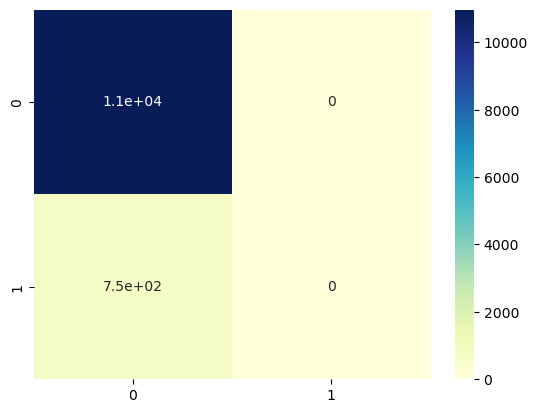

In [45]:
# ytest, pred
sns.heatmap(confusion_matrix(ytest, log_pred[1:]), 
            annot = True, cmap = "YlGnBu")
plt.show()

In [46]:
print(classification_report(ytest, log_pred[1:]))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10968
           1       0.00      0.00      0.00       750

    accuracy                           0.94     11718
   macro avg       0.47      0.50      0.48     11718
weighted avg       0.88      0.94      0.91     11718



In [47]:
# Naive Bayes Prediction
predict = pd.DataFrame(nb_pred).T.mode(axis = 1)
print(classification_report(ytest, predict[1:]))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10968
           1       0.00      0.00      0.00       750

    accuracy                           0.94     11718
   macro avg       0.47      0.50      0.48     11718
weighted avg       0.88      0.94      0.91     11718



### Smote

* SMOTE is known as Synthetic Minority Oversampling Technique

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
smote = SMOTE(sampling_strategy="minority")
X_resampled, y_resampled = smote.fit_resample(X, y)

In [50]:
y_resampled.value_counts(normalize = True)

0    0.5
1    0.5
Name: is_claim, dtype: float64

In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

logreg = LogisticRegression()
nbayes = GaussianNB()

kfold = StratifiedKFold(n_splits = 5,
                       shuffle = True, random_state = 123)

predictions = []
nb_pred = []

for train_idx, test_idx in kfold.split(X_resampled, y_resampled):
    xtrain = X_resampled.iloc[train_idx]
    ytrain = y_resampled.iloc[train_idx]
    xtest = X_resampled.iloc[test_idx]
    ytest = y_resampled.iloc[test_idx]
    pred = logreg.fit(xtrain, ytrain).predict(xtest)
    pred_nb = nbayes.fit(xtrain, ytrain).predict(xtest)
    predictions.append(pred)
    nb_pred.append(pred_nb)

In [52]:
log_pred = pd.DataFrame(predictions).T.mode(axis = 1)

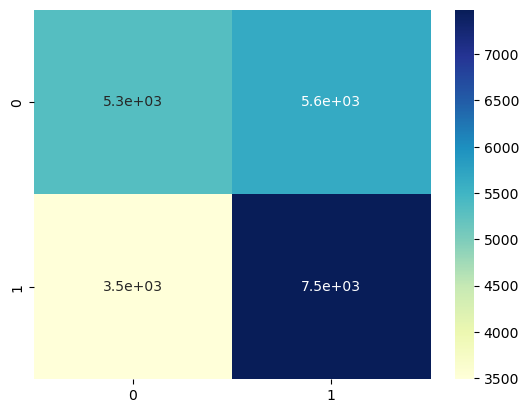

In [53]:
sns.heatmap(confusion_matrix(ytest, log_pred[1:]), 
            annot = True, cmap = "YlGnBu")
plt.show()

In [54]:
print(classification_report(ytest, log_pred[1:]))

              precision    recall  f1-score   support

           0       0.60      0.49      0.54     10968
           1       0.57      0.68      0.62     10969

    accuracy                           0.58     21937
   macro avg       0.59      0.58      0.58     21937
weighted avg       0.59      0.58      0.58     21937



In [55]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

kfold = StratifiedKFold(n_splits = 5,
                       shuffle = True, random_state = 123)
pred_tree = []

for train_idx, test_idx in kfold.split(X_resampled, y_resampled):
    xtrain = X_resampled.iloc[train_idx]
    ytrain = y_resampled.iloc[train_idx]
    xtest = X_resampled.iloc[test_idx]
    ytest = y_resampled.iloc[test_idx]
    pred = dtree.fit(xtrain, ytrain).predict(xtest)
    pred_tree.append(pred)

In [56]:
pred_tree = pd.DataFrame(pred_tree).T.mode(axis = 1)
print(classification_report(ytest, pred_tree[1:]))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10968
           1       0.99      0.93      0.96     10969

    accuracy                           0.96     21937
   macro avg       0.96      0.96      0.96     21937
weighted avg       0.96      0.96      0.96     21937



#### KNN

* It is the simplest model which relies on distance metric to make the prediction

* Basic Principle - it will find the 'K' nearest neighbors and will calculate the distance of the points and will make the prediction on the basis of the shortest possible distance between the Points.

* Regression - In Regression, it will take the average value of the nearest neighbors and will generate the prediction.

* Classification - The nearest possible distance will be classified accordingly. For example if the distance with the 0 class is the least, it will be classified as 0.

* It is easy to Intepret and explain in comparison to the Neural Net.

* Challenge - Large Datasets. So, if the data is suffering from the Curse of Dimensionality, then KNN will fail miserably.

* What happens during fit and predict - When we fit the model, knn stores the data and while predicting, it calculates the distance using Distance metrics and then generates the prediction.

In [57]:
# Lets find the  KValue
from sklearn.neighbors import KNeighborsClassifier

In [64]:
# Range of k to try
k_range = range(1,30)

knn_scores = []

from sklearn.model_selection import cross_val_score

for i in k_range:
    knn= KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(estimator=knn, X = X_resampled, 
                             y = y_resampled, 
                            scoring = "recall")
    knn_scores.append(scores.mean())

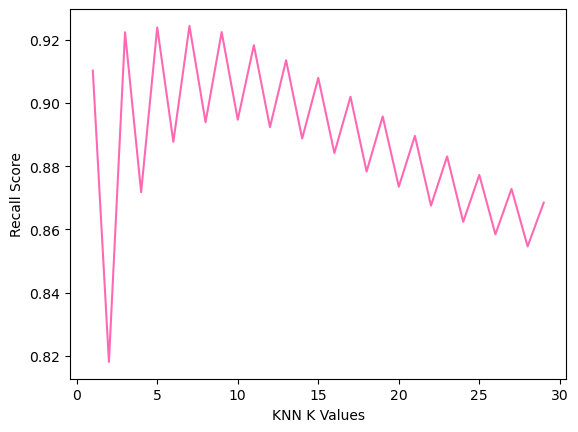

In [65]:
# Plot the knn

plt.plot(k_range, knn_scores, color = "hotpink")
plt.xlabel("KNN K Values")
plt.ylabel("Recall Score")
plt.show()

In [66]:
# Ideal K Value
best = k_range[np.argmax(knn_scores)]
print(f"K Value for the Data is {best}") # 1

K Value for the Data is 7


In [76]:
knn = KNeighborsClassifier(n_neighbors=5)

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_resampled,
                                               y_resampled,
                                               test_size = 0.30,
                                               random_state = 420)

In [77]:
pred = knn.fit(xtrain,ytrain).predict(xtest)

print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78     16414
           1       0.75      0.92      0.83     16493

    accuracy                           0.81     32907
   macro avg       0.82      0.81      0.81     32907
weighted avg       0.82      0.81      0.81     32907



### Pruning of Decision Tree

In [88]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

params ={"criterion":['gini', 'entropy', 'log_loss'],
        "splitter":["best", "random"],
        "max_depth":[3, 4, 5, 6, 7],
        "min_samples_split":[50, 100, 150,200]}

grid = GridSearchCV(estimator=dtree, 
                   param_grid=params,
                   cv = 5)

In [89]:
# Fit the Model
grid.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200],
                         'splitter': ['best', 'random']})

In [93]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_split': 50,
 'splitter': 'best'}

In [91]:
dtree = DecisionTreeClassifier(criterion="gini", 
                              max_depth=7, 
                              min_samples_split=50,
                              splitter="best")

In [92]:
pred = dtree.fit(xtrain,ytrain).predict(xtest)

print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.76      0.64      0.70     16414
           1       0.69      0.80      0.74     16493

    accuracy                           0.72     32907
   macro avg       0.73      0.72      0.72     32907
weighted avg       0.73      0.72      0.72     32907

